In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt



In [2]:
#Load data
df=pd.read_csv('encoded_car_data (1).csv')
print(df.head())

   diesel  gas  std  turbo  convertible  hardtop  hatchback  sedan  wagon  \
0     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
1     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
2     0.0  1.0  1.0    0.0          0.0      0.0        1.0    0.0    0.0   
3     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   
4     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   

   4wd  ...  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
1  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
2  0.0  ...       94.5      2823.0       152.0       2.68       154.0   
3  0.0  ...       99.8      2337.0       109.0       3.19       102.0   
4  1.0  ...       99.4      2824.0       136.0       3.19       115.0   

   carlength  carwidth  citympg  highwaympg    price  
0      168.8      64.1     21.0        27.0

In [3]:
#select features & target 
x=df[['enginesize','horsepower','citympg','highwaympg']]
y=df['price']


In [4]:
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:

#linear regression (with scaling)
lr=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
lr.fit(x_train,y_train)
y_pred_linear=lr.predict(x_test)

In [6]:
#polynomial regression (degrees=2)
poly_model = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
poly_model.fit(x_train,y_train)
y_pred_poly=poly_model.predict(x_test)

In [12]:
#evaluate models
print('Name: devendran /AIML')
print('Reg. No:212225240030')
print("Linear Regression:")
# ese-mean_squared error(y_test, y pred linear)
print('MSE=',mean_squared_error(y_test, y_pred_linear))
r2score=r2_score(y_test,y_pred_linear)
print('R2 Score=', r2score)

# print (fSE: (mean_squared_error(y_test, y pred_linear):.2f)") 
#print(f"R: (r2_score(y_test, y_pred_linear):.2f)")

print("\nPolynomial Regression:")
print (f"MSE: {mean_squared_error(y_test, y_pred_poly): 2f}") 
print(f"R²: {r2_score(y_test, y_pred_poly):.2f}")

Name: devendran /AIML
Reg. No:212225240030
Linear Regression:
MSE= 16471505.900042146
R2 Score= 0.7913520781370976

Polynomial Regression:
MSE:  15247661.892214
R²: 0.81


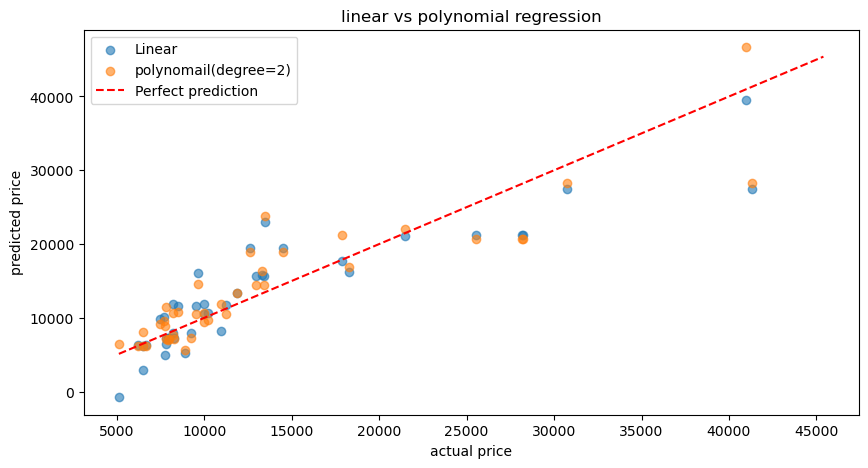

In [14]:
#plot the actual and predicted
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_linear,label='Linear',alpha=0.6)
plt.scatter(y_test,y_pred_poly,label='polynomail(degree=2)',alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',label='Perfect prediction')
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("linear vs polynomial regression")
plt.legend()
plt.show()